# Retrieval


Finding the most similar or different images may be of great help in different computer vision applications. For example, different Artificial Intelligence applications use these techniques to check if their result is far from what was expected. In addition, we can find contrary or similar images in an image dataset without the need to search them manually.


In this tutorial we will see how to determine :

- The distance between images (similarity search)
    - Using Gaussian filters
    - Using LBP
- The most similar image based on texture,
- The most similar image based on color.


## 1. Distance between images (similarity search)

### Imports

In [1]:
from skimage import data
from skimage.color import label2rgb
import matplotlib.pyplot as plt
import numpy as np
import time
import scipy
from skimage import filters
from skimage import io, color
import os
from skimage.transform import resize
import skimage

%matplotlib inline

### Load & resize images

In [2]:
# Resize dimension 100 x 100
x = 100
y = 100

# Load images: pizza, paella, flowers
path = "./textures_images/pizza/"                       
pizza_images = [resize(skimage.io.imread(path + f), (x, y)) for f in os.listdir(path)]

path = "./textures_images/paella/"
paella_images = [resize(skimage.io.imread(path + f), (x, y)) for f in os.listdir(path)]

path = "./textures_images/flowers/"
flowers_images = [resize(skimage.io.imread(path + f), (x, y)) for f in os.listdir(path)]

In [3]:
#visualize
def visualize2(img1,img2,label1,label2):
    #visualize
    fig=plt.figure(figsize=(15,15))
    fig.add_subplot(1,2,1)
    plt.title(label1)
    plt.imshow(img1, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(1,2,2)
    plt.title(label2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img2, cmap='gray')
    
def visualize3(img1,img2,img3,label1,label2,label3):
    #visualize
    fig=plt.figure(figsize=(15,15))
    fig.add_subplot(1,3,1)
    plt.title(label1)
    plt.imshow(img1, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(1,3,2)
    plt.title(label2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img2, cmap='gray')
    fig.add_subplot(1,3,3)
    plt.xticks([])
    plt.yticks([])
    plt.title(label3)
    plt.imshow(img3, cmap='gray')


def visualize4(img1,img2,img3,img4,label1,label2,label3,label4):
    #visualize
    fig=plt.figure(figsize=(15,15))
    fig.add_subplot(1,4,1)
    plt.title(label1)
    plt.imshow(img1, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(1,4,2)
    plt.title(label2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img2, cmap='gray')
    fig.add_subplot(1,4,3)
    plt.xticks([])
    plt.yticks([])
    plt.title(label3)
    plt.imshow(img3, cmap='gray')
    fig.add_subplot(1,4,4)
    plt.xticks([])
    plt.yticks([])
    plt.title(label4)
    plt.imshow(img4, cmap='gray')



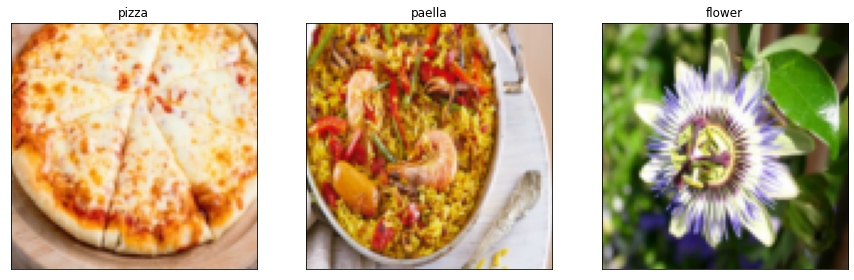

In [4]:
#visualize 
visualize3(pizza_images[0], paella_images[0], flowers_images[0], 'pizza', 'paella', 'flower')

## 1.1. Similarity using Gaussian filters

To get the similartiy between images:

1. Apply the filters to extract the feature vectors of each image. The feature vector will be the mean of the absolute value of the convolved image by filter  𝑘. 
2. Compute the Euclidean distance to get the similarity between the images

In [5]:
import LM_filters
# Load filters
filter_bank = LM_filters.makeLMfilters()
filter_bank.shape

LM filters imported, the shape of the filter bank is:  (49, 49, 48)


(49, 49, 48)

(49, 49, 48)


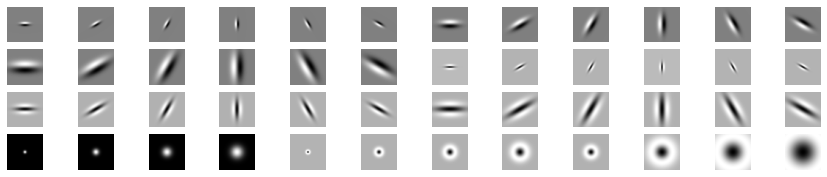

In [6]:
n_filters = filter_bank.shape[-1]
print(filter_bank.shape)

#visualize the filters
fig, ax = plt.subplots(ncols=12, nrows=4, figsize=(15,3))

k = 0
for i in range(4):
    for j in range(12):
        ax[i,j].imshow(filter_bank[:,:,k], cmap = 'gray')
        ax[i,j].axis("off")
        k = k + 1

### Feature vector from the filter bank

 Given an image, the returned feature vector must contain at position $k$ the mean of the absolute value of the convolved image by filter $k$.

$$
\text{feat}(x) = \left( \text{mean}( |r_1|), \dots,\text{mean}(|r_D|) \right)
$$

In [7]:
from skimage.color import rgb2gray
import numpy as np
from scipy.linalg import norm

def features_from_filter_bank(image, filter_bank, n_filters=filter_bank.shape[-1]):
    im_conv = np.zeros(image.shape)
    features_for_im = np.zeros(n_filters)
    
    for i in range(n_filters):
        scipy.ndimage.convolve(image, filter_bank[:,:,i], output=im_conv)
        features_for_im[i] = np.mean(np.abs(im_conv))
  
    return features_for_im

fv_fpizza0=features_from_filter_bank(rgb2gray(pizza_images[0]), filter_bank)
fv_paella0=features_from_filter_bank(rgb2gray(paella_images[0]), filter_bank)
fv_flowers0=features_from_filter_bank(rgb2gray(flowers_images[0]), filter_bank)


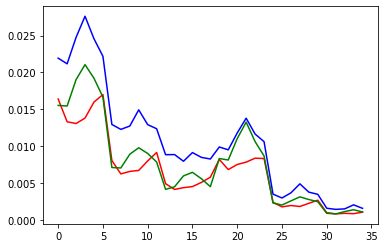

In [8]:
plt.plot(fv_fpizza0[:35],'r')
plt.plot(fv_paella0[:35],'g')
plt.plot(fv_flowers0[:35],'b')
plt.show()

### Compare similarity between images

Given a query image $x$ and another image $x^m$ from the database, we can compute the distance between images as:
$$
\text{distance}\left( x , \, x^m \right) = \| \text{feat}(x)  - \text{feat}(x^m)  \|_2 =  \sqrt{ \sum_{d=1}^\text{D} \left( f(x)_d - f(x^m)_d  \right)^2 }
$$


In [9]:
# Plot images and distance
def plotImgAndDistance(img1, img2, distance):
    # Plot images and distance
    fig, ax= plt.subplots(ncols=2, nrows=1, figsize=(10,10))
    ax[0].imshow(img1)
    ax[0].set_title('Original', fontsize=10)
    #fig.suptitle('Distance: ' + str(distance), fontsize=20)
    ax[1].imshow(img2)
    ax[1].set_title('Distance to the original image: ' + str(distance), fontsize=10)
    plt.show()

In [10]:
# Extract feature vector and get the distance
def getDistance(im1, im2, im1_gray, im2_gray, filter_bank):
    
    # Feature vector
    n_filters = filter_bank.shape[-1]
    features_for_im1 = features_from_filter_bank(im1_gray, filter_bank, n_filters)
    features_for_im2 = features_from_filter_bank(im2_gray, filter_bank, n_filters)

    # Compute distance
    distance = np.sqrt(np.sum((features_for_im1 - features_for_im2)**2)) # Alternative of scipy.spatial.distance import euclidean

    # Plot images and distance
    plotImgAndDistance(im1, im2, distance)
    

### Pizza vs pizza

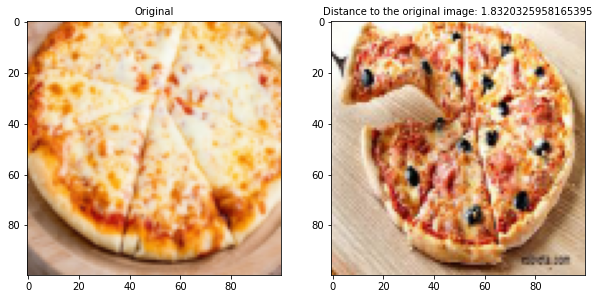

In [11]:
# Load images
im1 = pizza_images[0]
im2 = pizza_images[2]
im1_gray = skimage.color.rgb2gray(im1)
im2_gray = skimage.color.rgb2gray(im2)

# Distance
getDistance(im1, im2, im1_gray, im2_gray, filter_bank)


### Pizza vs flower

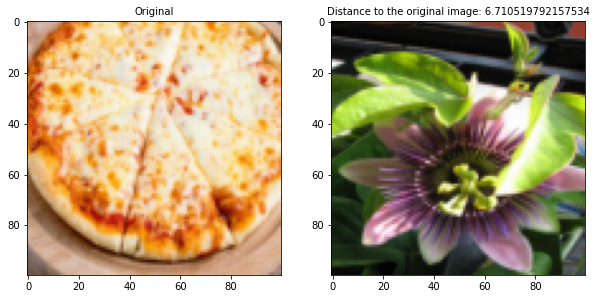

In [12]:
# Load images
im1 = pizza_images[0]
im2 = flowers_images[2]
im1_gray = skimage.color.rgb2gray(im1)
im2_gray = skimage.color.rgb2gray(im2)

# Distance
getDistance(im1, im2, im1_gray, im2_gray, filter_bank)

### Pizza vs paella

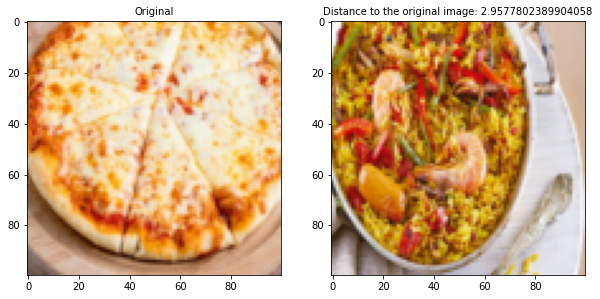

In [13]:
# Load images
im1 = pizza_images[0]
im2 = paella_images[0]
im1_gray = skimage.color.rgb2gray(im1)
im2_gray = skimage.color.rgb2gray(im2)

# Distance
getDistance(im1, im2, im1_gray, im2_gray, filter_bank)

**Exercise:** Try the algorithm with comparing another images and see what happens. Do the results make sense?

**Answ:** It makes sense, for instance, with the examples provided we can see that the distance to the original (pizza vs pizza, pizza vs paella, pizza vs flower) makes sense because **pizza vs pizza is the closest one** and **pizza vs flower is the furthest one**. 

## Similarity between rotated images using Gaussian filters

In [14]:
# Rotated images - Get distance 
def getDistanceRotated(im1, im2, im1_gray, im2_gray, filter_bank, degrees):
    
    # Color rotated images
    color_rotated_img1 = rotate(im1, angle=degrees, resize=False, center=None, order=1, mode='constant', cval=0, clip=True, preserve_range=False)
    color_rotated_img2 = rotate(im2, angle=degrees, resize=False, center=None, order=1, mode='constant', cval=0, clip=True, preserve_range=False)

    # Rotated images
    rotated_img1 = rotate(im1_gray, angle=degrees, resize=False, center=None, order=1, mode='constant', cval=0, clip=True, preserve_range=False)
    rotated_img2 = rotate(im2_gray, angle=degrees, resize=False, center=None, order=1, mode='constant', cval=0, clip=True, preserve_range=False)
    
    # Feature vector
    n_filters = filter_bank.shape[-1]
    features_for_im1 = features_from_filter_bank(rotated_img1, filter_bank, n_filters)
    features_for_im2 = features_from_filter_bank(rotated_img2, filter_bank, n_filters)

    # Compute distance
    distance = np.sqrt(np.sum((features_for_im1 - features_for_im2)**2)) 

    # Plot images and distance
    plotImgAndDistance(color_rotated_img1, color_rotated_img2, distance)
    

### Pizza vs pizza

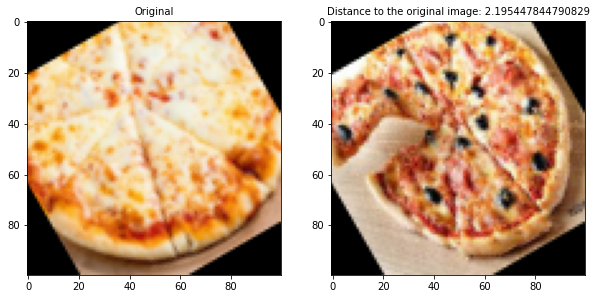

In [15]:
from skimage.transform import rotate
# Load images
im1 = pizza_images[0]
im2 = pizza_images[2]
im1_gray = skimage.color.rgb2gray(im1)
im2_gray = skimage.color.rgb2gray(im2)

getDistanceRotated(im1, im2, im1_gray, im2_gray, filter_bank, degrees=30)

### Pizza vs flower

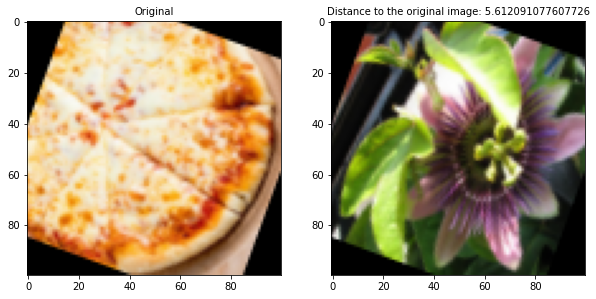

In [16]:
# Load images
im1 = pizza_images[0]
im2 = flowers_images[2]
im1_gray = skimage.color.rgb2gray(im1)
im2_gray = skimage.color.rgb2gray(im2)

getDistanceRotated(im1, im2, im1_gray, im2_gray, filter_bank, degrees=70)

### Pizza vs paella

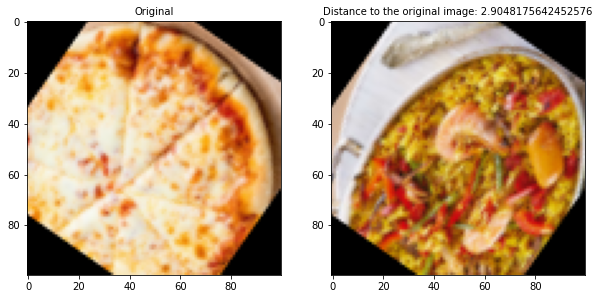

In [17]:
# Load images
im1 = pizza_images[0]
im2 = paella_images[0]
im1_gray = skimage.color.rgb2gray(im1)
im2_gray = skimage.color.rgb2gray(im2)

getDistanceRotated(im1, im2, im1_gray, im2_gray, filter_bank, degrees=145)

**Exercise:** Describe what happens to the distance when you apply a rotation. Is it invariable to rotation? 

**Ans:** It isn't. We can see that the distances have changed compared to the original examples due to the changes in the mean of the filters

## Similarity between intensity rescaled images using Gaussian filters 

### Pizza vs pizza

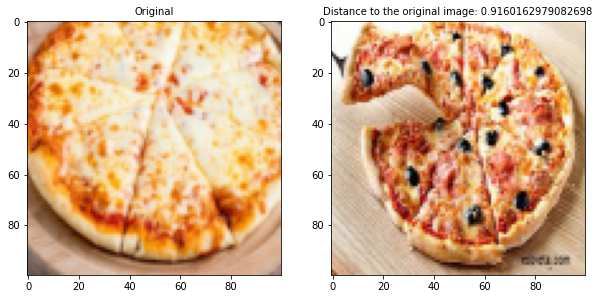

In [18]:
# Load images
im1 = pizza_images[0]
im2 = pizza_images[2]
im1_gray = skimage.color.rgb2gray(im1)/2 # Rescaled by 2
im2_gray = skimage.color.rgb2gray(im2)/2 

# Distance
getDistance(im1, im2, im1_gray, im2_gray, filter_bank)

### Pizza vs flower

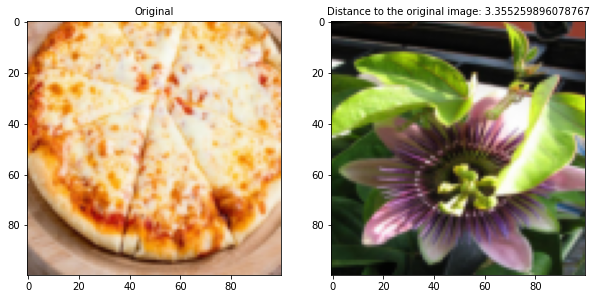

In [19]:
# Load images
im1 = pizza_images[0]
im2 = flowers_images[2]
im1_gray = skimage.color.rgb2gray(im1)/2
im2_gray = skimage.color.rgb2gray(im2)/2

# Distance
getDistance(im1, im2, im1_gray, im2_gray, filter_bank)

### Pizza vs paella

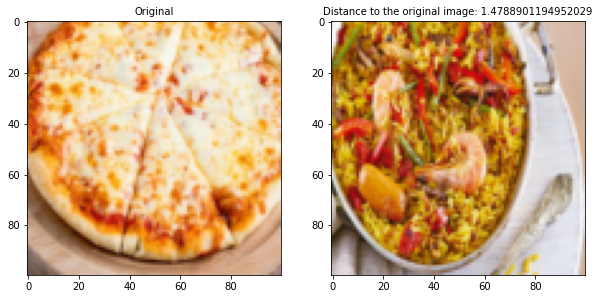

In [20]:
# Load images
im1 = pizza_images[0]
im2 = paella_images[0]
im1_gray = skimage.color.rgb2gray(im1)/2
im2_gray = skimage.color.rgb2gray(im2)/2

# Distance
getDistance(im1, im2, im1_gray, im2_gray, filter_bank)

**Exercise:** Does the intensity rescaling affect the results?

It affects, we can see how the distances have changed. The distance is exactly half because we have rescaled the intensity by half.

## Similarity between size rescaled images using Gaussian filters  

### Pizza vs pizza

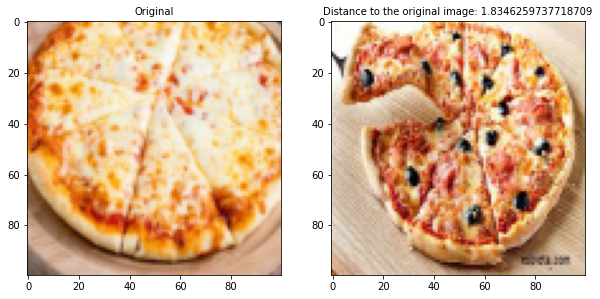

In [21]:
from skimage.transform import rescale

# Load images
im1 = pizza_images[0]
im2 = pizza_images[2]
im1_gray = rescale(skimage.color.rgb2gray(im1), 0.5) # Rescaled 0.5
im2_gray = rescale(skimage.color.rgb2gray(im2), 0.5)

# Distance
getDistance(im1, im2, im1_gray, im2_gray, filter_bank)

### Pizza vs flower

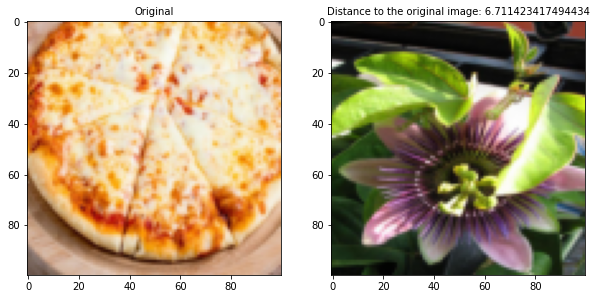

In [22]:
# Load images
im1 = pizza_images[0]
im2 = flowers_images[2]
im1_gray = rescale(skimage.color.rgb2gray(im1), 0.5) # Rescaled 0.5
im2_gray = rescale(skimage.color.rgb2gray(im2), 0.5)

# Distance
getDistance(im1, im2, im1_gray, im2_gray, filter_bank)

### Pizza vs paella

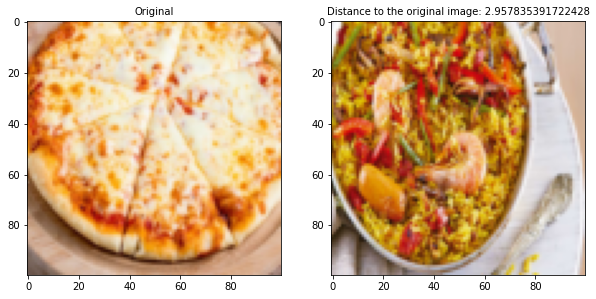

In [23]:
# Load images
im1 = pizza_images[0]
im2 = paella_images[0]
im1_gray = rescale(skimage.color.rgb2gray(im1), 0.5) # Rescaled 0.5
im2_gray = rescale(skimage.color.rgb2gray(im2), 0.5)

# Distance
getDistance(im1, im2, im1_gray, im2_gray, filter_bank)

**Exercise:** Does the rescaling affect the results?

**Ans:** It affect the results slightly. We can see a little difference in the distances.  

## 1.2. Similarity using Local Binary Pattern

**Local binary pattern** is an invariant descriptor. Let's see the most important arguments:

- Image
- P: Number of circularly symmetric neighbour set points
- R: Radius of circle
- method: method to determine the pattern --> default, ror, uniform, nri_uniform, var

Check LBP scikit-image documentation  [scikit-image documentation](https://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.local_binary_pattern)

In [43]:
# Imports
from skimage.feature import local_binary_pattern

In [79]:
# LBP parameters:
n_points = 8
radius = 1
METHOD = 'uniform'

def LBP(im1_gray, n_points, radius, METHOD):
    
    patterns = local_binary_pattern(im1_gray, n_points, radius)
    hist, _ = np.histogram(patterns, bins=np.arange(2**n_points + radius), density=True)
    return hist

In [45]:
# Extract feature vector and get the distance
def getDistanceLBP(im1, im2, im1_gray, im2_gray):
    
    # Feature vector
    features_for_im1 = LBP(im1_gray, n_points, radius, METHOD)
    features_for_im2 = LBP(im2_gray, n_points, radius, METHOD)

    # Compute distance
    distance = np.sqrt(np.sum((features_for_im1 - features_for_im2)**2)) # Alternative of scipy.spatial.distance import euclidean

    # Plot images and distance
    plotImgAndDistance(im1, im2, distance)

### Pizza vs pizza

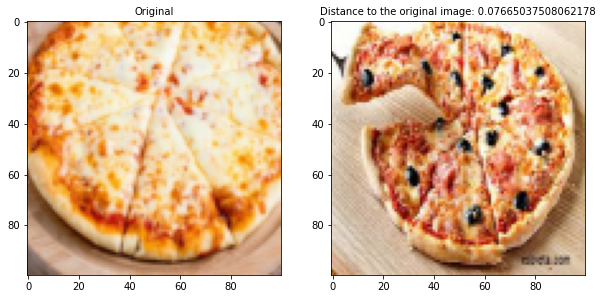

In [46]:
# Load images
im1 = pizza_images[0]
im2 = pizza_images[2]
im1_gray = skimage.color.rgb2gray(im1)
im2_gray = skimage.color.rgb2gray(im2)

# Distance
getDistanceLBP(im1, im2, im1_gray, im2_gray)

### Pizza vs flower

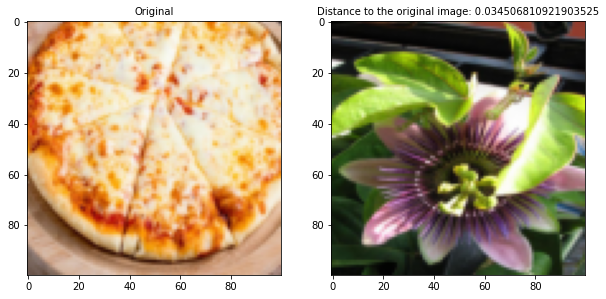

In [47]:
# Load images
im1 = pizza_images[0]
im2 = flowers_images[2]
im1_gray = skimage.color.rgb2gray(im1)
im2_gray = skimage.color.rgb2gray(im2)

# Distance
getDistanceLBP(im1, im2, im1_gray, im2_gray)

### Pizza vs paella

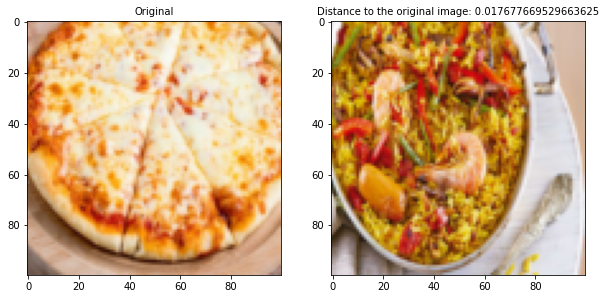

In [62]:
# Load images
im1 = pizza_images[0]
im2 = paella_images[0]
im1_gray = skimage.color.rgb2gray(im1)
im2_gray = skimage.color.rgb2gray(im2)

# Distance
getDistanceLBP(im1, im2, im1_gray, im2_gray)

**Exercise:** Do the results make sense?

**Answ:** The distance to the original (pizza vs pizza, pizza vs paella, pizza vs flower) doesn't make sense because **pizza vs paella is the closest**. The closest should be pizza vs pizza.

**Exercise:** Try the algorithm with comparing another images and see what happens. 

## Similarity between rotated images using LBP

In [63]:
# Rotated images - Get distance 
def getDistanceRotatedLBP(im1, im2, im1_gray, im2_gray, degrees):
    
    # Color rotated images
    color_rotated_img1 = rotate(im1, angle=degrees, resize=False, center=None, order=1, mode='constant', cval=0, clip=True, preserve_range=False)
    color_rotated_img2 = rotate(im2, angle=degrees, resize=False, center=None, order=1, mode='constant', cval=0, clip=True, preserve_range=False)

    # Rotated images
    rotated_img1 = rotate(im1_gray, angle=degrees, resize=False, center=None, order=1, mode='constant', cval=0, clip=True, preserve_range=False)
    rotated_img2 = rotate(im2_gray, angle=degrees, resize=False, center=None, order=1, mode='constant', cval=0, clip=True, preserve_range=False)
    
    # Feature vector
    features_for_im1 = LBP(rotated_img1, n_points, radius, METHOD)
    features_for_im2 = LBP(rotated_img2, n_points, radius, METHOD)

    # Compute distance
    distance = np.sqrt(np.sum((features_for_im1 - features_for_im2)**2)) 

    # Plot images and distance
    plotImgAndDistance(color_rotated_img1, color_rotated_img2, distance)
    

### Pizza vs pizza

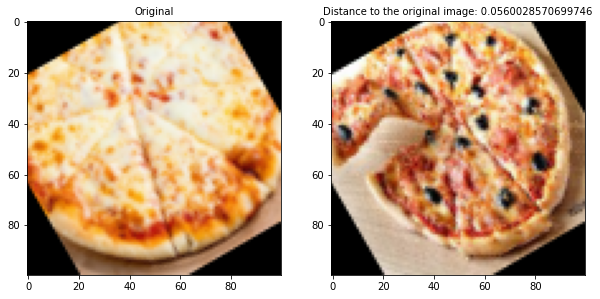

In [64]:
from skimage.transform import rotate
# Load images
im1 = pizza_images[0]
im2 = pizza_images[2]
im1_gray = skimage.color.rgb2gray(im1)
im2_gray = skimage.color.rgb2gray(im2)

getDistanceRotatedLBP(im1, im2, im1_gray, im2_gray, degrees=30)


### Pizza vs flower

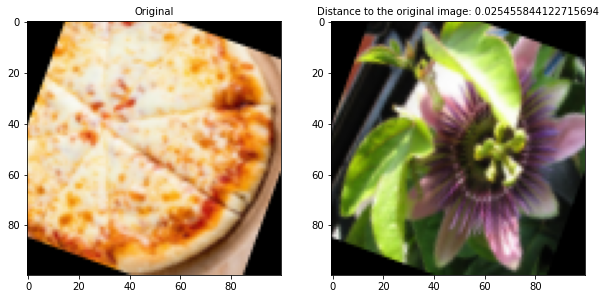

In [65]:
# Load images
im1 = pizza_images[0]
im2 = flowers_images[2]
im1_gray = skimage.color.rgb2gray(im1)
im2_gray = skimage.color.rgb2gray(im2)

getDistanceRotatedLBP(im1, im2, im1_gray, im2_gray, degrees=70)

### Pizza vs paella

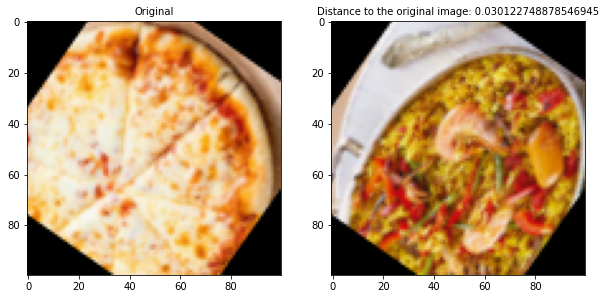

In [66]:
# Load images
im1 = pizza_images[0]
im2 = paella_images[0]
im1_gray = skimage.color.rgb2gray(im1)
im2_gray = skimage.color.rgb2gray(im2)

getDistanceRotatedLBP(im1, im2, im1_gray, im2_gray, degrees=145)

**Exercise:** Describe what happens to the distance when you apply a rotation. Is it invariable to rotation? 

**Ans:** It isn't. We can see that the distances have changed compared to the original examples due to the changes in the histogram.

## Similarity between intensity rescaled images using LBP

### Pizza vs pizza

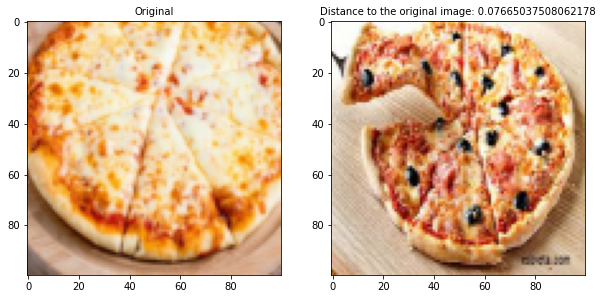

In [67]:
# Load images
im1 = pizza_images[0]
im2 = pizza_images[2]
im1_gray = skimage.color.rgb2gray(im1)/2
im2_gray = skimage.color.rgb2gray(im2)/2

# Distance
getDistanceLBP(im1, im2, im1_gray, im2_gray)

### Pizza vs flower

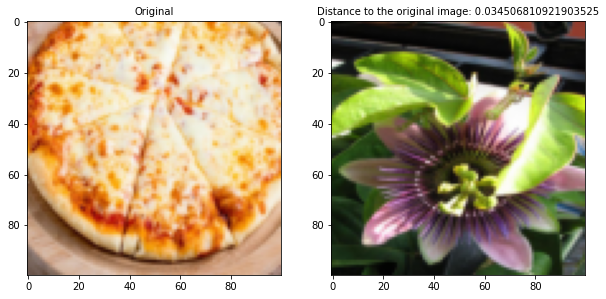

In [68]:
# Load images
im1 = pizza_images[0]
im2 = flowers_images[2]
im1_gray = skimage.color.rgb2gray(im1)/2
im2_gray = skimage.color.rgb2gray(im2)/2

# Distance
getDistanceLBP(im1, im2, im1_gray, im2_gray)

### Pizza vs paella

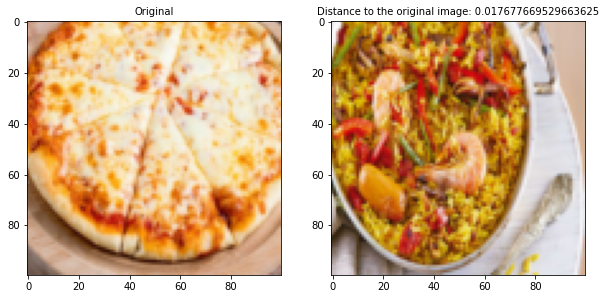

In [69]:
# Load images
im1 = pizza_images[0]
im2 = paella_images[0]
im1_gray = skimage.color.rgb2gray(im1)/2
im2_gray = skimage.color.rgb2gray(im2)/2

# Distance
getDistanceLBP(im1, im2, im1_gray, im2_gray)

**Exercise:** Does the intensity rescaling affect the results?

**Ans:** The intensity rescaling doesn't affect to the results. There isn't any change in the distance.

## Similarity between size rescaled images using LBP

### Pizza vs pizza

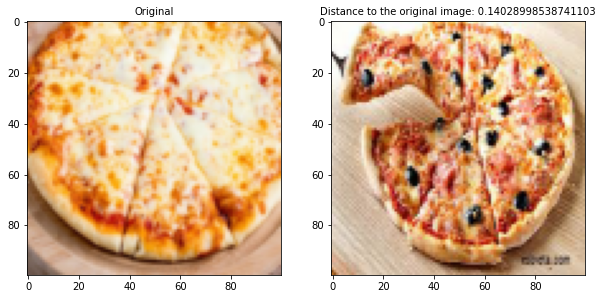

In [70]:
from skimage.transform import rescale
# Load images
im1 = pizza_images[0]
im2 = pizza_images[2]
im1_gray = rescale(skimage.color.rgb2gray(im1), 0.5) # Rescaled 0.5
im2_gray = rescale(skimage.color.rgb2gray(im2), 0.5)

# Distance
getDistanceLBP(im1, im2, im1_gray, im2_gray)

### Pizza vs flower

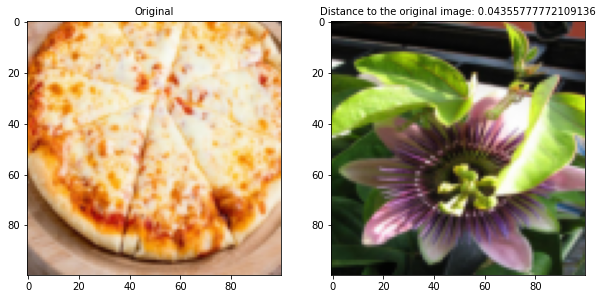

In [71]:
# Load images
im1 = pizza_images[0]
im2 = flowers_images[2]
im1_gray = rescale(skimage.color.rgb2gray(im1), 0.5) # Rescaled 0.5
im2_gray = rescale(skimage.color.rgb2gray(im2), 0.5)

# Distance
getDistanceLBP(im1, im2, im1_gray, im2_gray)

### Pizza vs paella

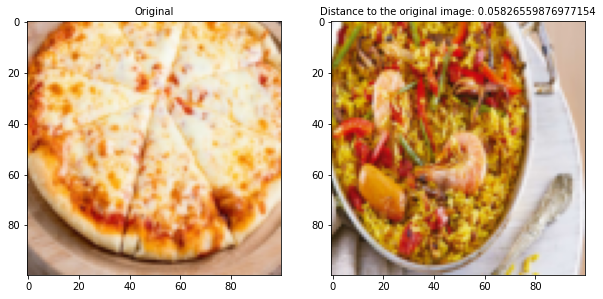

In [72]:
# Load images
im1 = pizza_images[0]
im2 = paella_images[0]
im1_gray = rescale(skimage.color.rgb2gray(im1), 0.5) # Rescaled 0.5
im2_gray = rescale(skimage.color.rgb2gray(im2), 0.5)

# Distance
getDistanceLBP(im1, im2, im1_gray, im2_gray)

**Exercise:** Does the rescaling affect the results?

**Ans:** It isn't invariant to the rescaling so it affects.

## 1.3.  Gaussian filters vs LBP similarity search

**Exercise:** Which transformation affect the result the most? 

**Ans**: In case of applying **Gaussian filters** the transformation that affects most is rotation. On the hand, **LBP** shows more differentes in the distances applying rotation as well.

 **Exercises:** What do you think works better? Why?

**Ans:** Gaussian filters works better because the results make more sense, getting the closest as **pizza vs pizza** and the furthest as **pizza vs flower**. Apart from that, we can see less differences applying transformations.

**Exercise:** Check the two algorithms with another images.

## 2. Retrieving the most similiar images based on texture

At this point, we can compute the similarity between the image and the rest of the database. Then we can find the closest image $x^{m^*}$ from the database to $x$ as $m^* =  \text{argmin}_{m} \{ \| \text{feat}(x)  - \text{feat}(x^m)  \|_2 \}$





### Extract the image features 

In [73]:
# For instance, let's work with the first 9 images
original_images = [pizza_images[0], flowers_images[0], paella_images[0], 
                   pizza_images[1], flowers_images[1], paella_images[1], 
                   pizza_images[2], flowers_images[2], paella_images[2]]

im1 = rgb2gray(pizza_images[0])
im2 = rgb2gray(flowers_images[0])
im3 = rgb2gray(paella_images[0])
im4 = rgb2gray(pizza_images[1])
im5 = rgb2gray(flowers_images[1])
im6 = rgb2gray(paella_images[1])
im7 = rgb2gray(pizza_images[2])
im8 = rgb2gray(flowers_images[2])
im9 = rgb2gray(paella_images[2])


# save the features in a vector.
features_vector = []
n_filters = filter_bank.shape[-1]
features_vector.append(features_from_filter_bank(im1, filter_bank, n_filters))
features_vector.append(features_from_filter_bank(im2, filter_bank, n_filters))
features_vector.append(features_from_filter_bank(im3, filter_bank, n_filters))
features_vector.append(features_from_filter_bank(im4, filter_bank, n_filters))
features_vector.append(features_from_filter_bank(im5, filter_bank, n_filters))
features_vector.append(features_from_filter_bank(im6, filter_bank, n_filters))
features_vector.append(features_from_filter_bank(im7, filter_bank, n_filters))
features_vector.append(features_from_filter_bank(im8, filter_bank, n_filters))
features_vector.append(features_from_filter_bank(im9, filter_bank, n_filters))



(9, 48)


Text(0.5, 1.0, 'Image to retrieve the most similar images')

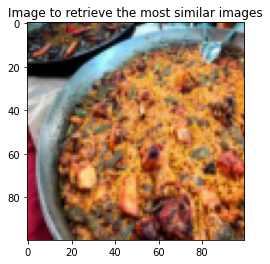

In [74]:
# Convert to an array with shape = (len(images), len(feature))
X = np.array(features_vector)
print(X.shape)
# Prepare the query image
img_index = 5
query_1 = X[img_index, :]

# Display the query images
plt.imshow(original_images[img_index])
plt.title('Image to retrieve the most similar images')

**Exercise:** Create a function to get the most similar images

In [75]:
# Query: feature vector of the img_index
# X: array with all feature vectors, shape = (len(features_vector), len(feature))
# K: desired number of most similar images

def retrieve_k_images_from_X(query, X, k):
    # Compute the distances
    # Sort distances 
    # Get the K most similar images
    # Plot the closest images to query
    

SyntaxError: unexpected EOF while parsing (<ipython-input-75-0c9dcf5383c6>, line 10)

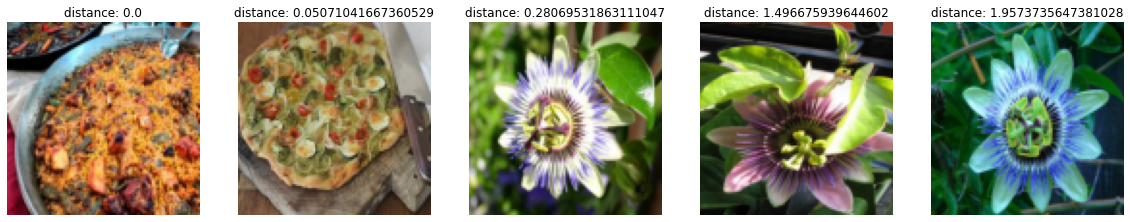

In [76]:
'''Solution'''


def retrieve_k_images_from_X(query, X, k):
    
    distances = np.sqrt(np.sum((X - query)**2, axis=1))
    closest_to_query = np.argsort(distances)
    closest_images = [original_images[ind] for ind in closest_to_query[0:k]]
    return closest_images, distances

def print_closest_image_to_query(closest_images, distances):
    fig, ax= plt.subplots(ncols=5, nrows=1, figsize=(20,30))
    for i, im in enumerate(closest_images):
        ax[i].imshow(im)
        ax[i].axis("off")
        ax[i].set_title('distance: ' + str(np.sort(distances)[i]))
        
        
closest_images_1,  distances_1 = retrieve_k_images_from_X(query_1, X, 5)
print_closest_image_to_query(closest_images_1, distances_1)


**Exercise:** Select one image and compare it with the dataset. What is the closest image? And the furthest images?

**Exercise:** Use LBP to extract the features. What is the closest image? And the furthest images?

## 3. Retrieving the most similar images based on texture of the separate color channels

If the previous feature vectors had 49 components now they will have 49*3 components. 


**Exercise**: Make a function that applies the filter to the 3 channels and save the mean

In [77]:
def lm_features_rgb(image, filter_bank):

    n_filters = len(filter_bank)
    im_conv = np.array(image[:,:,0])
    features_for_im = np.zeros(3*n_filters)
    
    for i in range(n_filters-1):
        
        # Apply filter to the first channel and save the mean
        # Apply filter to the second channel and save the result
        # Apply filter to the third channel and save the result
        
    return features_for_im

IndentationError: expected an indented block (<ipython-input-77-f42a240bf5f9>, line 13)

In [78]:
'''
Solution
'''
def lm_features_rgb(image, filter_bank):
    n_filters = len(filter_bank)
    im_conv = np.array(image[:,:,0])
    features_for_im = np.zeros(3*n_filters)
    k = 0
    
    for i in range(n_filters-1):

        scipy.ndimage.convolve(image[:,:,0], filter_bank[:,:,i] , output=im_conv)
        features_for_im[k] =  np.abs(im_conv).mean()
        
        scipy.ndimage.convolve(image[:,:,1], filter_bank[:,:,i] , output=im_conv)
        features_for_im[k+1] =  np.abs(im_conv).mean()
        
        scipy.ndimage.convolve(image[:,:,2], filter_bank[:,:,i] , output=im_conv)
        features_for_im[k+2] =  np.abs(im_conv).mean()
        
        k = i + 3        
        
    return features_for_im

**Exercise**: Get the most similar images using the new function lm_features_rgb

In [ ]:
'''
Solution
'''

# save the features in a vector.
features_vector_color = []
features_vector_color.append(lm_features_rgb(original_images[0], filter_bank))
features_vector_color.append(lm_features_rgb(original_images[1], filter_bank))
features_vector_color.append(lm_features_rgb(original_images[2], filter_bank))
features_vector_color.append(lm_features_rgb(original_images[3], filter_bank))
features_vector_color.append(lm_features_rgb(original_images[4], filter_bank))
features_vector_color.append(lm_features_rgb(original_images[5], filter_bank))
features_vector_color.append(lm_features_rgb(original_images[6], filter_bank))
features_vector_color.append(lm_features_rgb(original_images[7], filter_bank))
features_vector_color.append(lm_features_rgb(original_images[8], filter_bank))

In [ ]:
# Convert to an array with shape = (len(images), len(feature)*3)
X = np.array(features_vector_color)
print(X.shape)
# Prepare the query image
img_index = 5
query_1 = X[img_index, :]

# Display the query images
plt.imshow(original_images[img_index])
plt.title('Image to retrieve the most similar images')

In [ ]:
closest_images_1,  distances_1 = retrieve_k_images_from_X(query_1, X, 5)
print_closest_image_to_query(closest_images_1, distances_1)

**Exercise**: Compare different queries using the two methods (based on color and texture)
